## Observations and Insights

1. The dataset is standard in terms of starting point of tumor volume which is 45 across all the samples and it shows that the final tumor size within the drug regimen, for the 4 best performers, are of similar size. Out of the four best performers, there's only one outlier in the drug "Infubinol".
2. Drug "Capomulin" and "Ramicane" give the lowest final tumor sizes for time period of 45 days, however a line graph for mouse ID "l509" shows that the tumor size started to increase after a given point of time, which means it may not completely cure the tumor and that it has chances of growing back.
4. The age of samples are not standard, they range from 1 to 24 months which might affect recovery of Tumor irrespective of the drug regimen. 
3. There's a direct correlation in weight and Tumor Volume, as the weight increases so does the tumor volume.

## Dependencies and starter code

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined= pd.merge(mouse_metadata,study_results, on="Mouse ID" )
combined.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean=combined.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"].map("{:.2f}".format)
median=combined.groupby("Drug Regimen").median()["Tumor Volume (mm3)"].map("{:.2f}".format)
variance=combined.groupby("Drug Regimen").var()["Tumor Volume (mm3)"].map("{:.2f}".format)
std_dev=combined.groupby("Drug Regimen").std()["Tumor Volume (mm3)"].map("{:.2f}".format)
sem=combined.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"].map("{:.2f}".format)
statsdf=pd.DataFrame({"Mean": mean,"Median": median,"Variance": variance,"Standard Deviation": std_dev,"SEM": sem})
statsdf

Mean Median Variance Standard Deviation   SEM
Drug Regimen                                                
Capomulin     40.68  41.56    24.95               4.99  0.33
Ceftamin      52.59  51.78    39.29               6.27  0.47
Infubinol     52.88  51.82    43.13               6.57  0.49
Ketapril      55.24  53.70    68.55               8.28  0.60
Naftisol      54.33  52.51    66.17               8.13  0.60
Placebo       54.03  52.29    61.17               7.82  0.58
Propriva      52.32  50.85    42.35               6.51  0.51
Ramicane      40.22  40.67    23.49               4.85  0.32
Stelasyn      54.23  52.43    59.45               7.71  0.57
Zoniferol     53.24  51.82    48.53               6.97  0.52

## Bar plots

Text(0.5, 0, 'Drug Regimen')

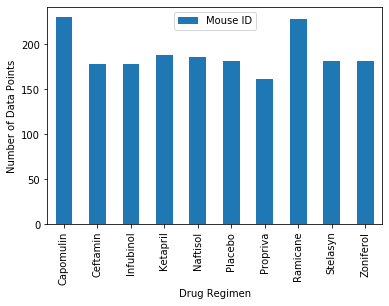

In [34]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
treatments_grouped=combined["Mouse ID"].groupby(combined["Drug Regimen"]).count()
treatments_grouped=pd.DataFrame(treatments_grouped)
barplot=treatments_grouped.plot(kind="bar")
barplot.set_ylabel("Number of Data Points")
barplot.set_xlabel("Drug Regimen")

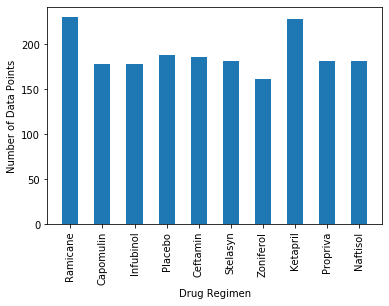

<Figure size 720x720 with 0 Axes>

In [43]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
treatments=combined["Drug Regimen"].unique()

x=treatments
y=combined["Mouse ID"].groupby(combined["Drug Regimen"]).count()
plt.bar(x,y, align="center", width=0.50)
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.figure(figsize=(10,10))
plt.tight_layout()
plt.show()

## Pie plots

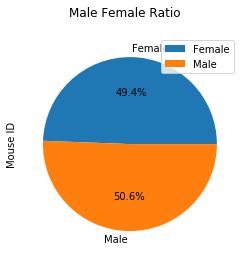

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender=combined.groupby("Sex").count()["Mouse ID"]
gender=pd.DataFrame(gender)
gender.plot(kind="pie", subplots=True, autopct="%1.1f%%", title="Male Female Ratio")
plt.show()

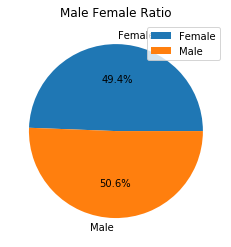

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female", "Male"]
size=gender["Mouse ID"]
plt.pie(size, labels=labels, autopct="%1.1f%%")
plt.title("Male Female Ratio")
plt.legend()
plt.show()

## Quartiles, outliers and boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
regimen=combined.groupby("Mouse ID").last()["Drug Regimen"]
timepoint=combined.groupby("Mouse ID").max()["Timepoint"]
tumorvol=combined.groupby("Mouse ID").last()["Tumor Volume (mm3)"].map("{:.2f}".format)
finalgrouped=pd.DataFrame({"Drug Regimen":regimen,
    "Timepoint":timepoint,
    "Tumor Volume":tumorvol
})
promising_meds=["Capomulin", "Ramicane","Infubinol", "Ceftamin"]
newgrouped=finalgrouped[finalgrouped["Drug Regimen"].isin(promising_meds)]
newgrouped["Tumor Volume"]=pd.to_numeric(newgrouped["Tumor Volume"])
newgrouped

C:\Users\paras\Anaconda3\envs\PythonData2020_1\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Drug Regimen  Timepoint  Tumor Volume
Mouse ID                                      
a203        Infubinol         45         67.97
a251        Infubinol         45         65.53
a275         Ceftamin         45         63.00
a411         Ramicane         45         38.41
a444         Ramicane         45         43.05
...               ...        ...           ...
y769         Ceftamin         45         68.59
y793        Capomulin         45         31.90
y865         Ceftamin         45         64.73
z578         Ramicane         45         30.64
z581        Infubinol         45         62.75

[100 rows x 3 columns]

In [21]:
tum_vol=newgrouped["Tumor Volume"]
quartiles = tum_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of temperatures is: {round(lowerq, 2)}")
print(f"The upper quartile of temperatures is: {round(upperq,2)}")
print(f"The interquartile range of temperatures is: {round(iqr,2)}")

The lower quartile of temperatures is: 37.19
The upper quartile of temperatures is: 59.93
The interquartile range of temperatures is: 22.74


Text(0, 0.5, 'Final Tummor Volume (mm3)')

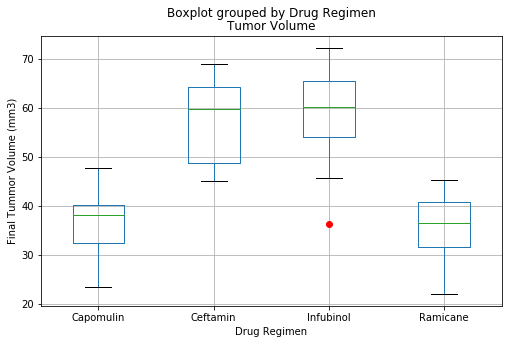

In [37]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot=newgrouped.boxplot(by="Drug Regimen", column=["Tumor Volume"], sym="r", figsize=(8,5))
plot.set_ylabel("Final Tummor Volume (mm3)")

## Line and scatter plots

In [23]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capdf=combined
regimen="Capomulin"
capdf=capdf.loc[capdf["Drug Regimen"]==regimen]
capdf.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   

    Tumor Volume (mm3)  Metastatic Sites  
10           45.000000                 0  
11           43.878496                 0  
12           37.614948                 0  
13           38.177232                 0  
14           36.866876                 0

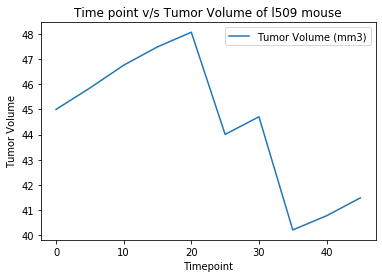

In [47]:
onemouse="l509"
onemousedf=capdf.loc[capdf["Mouse ID"]==onemouse]
mouseplot=onemousedf.plot("Timepoint", "Tumor Volume (mm3)", title="Time point v/s Tumor Volume of "+onemouse +" mouse")
mouseplot.set_ylabel("Tumor Volume")
plt.show()

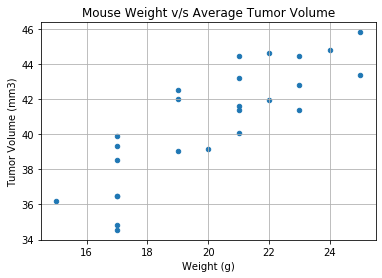

In [25]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
tumor=pd.DataFrame(capdf.groupby("Mouse ID").mean()["Tumor Volume (mm3)"])
weight=pd.DataFrame(capdf.groupby("Mouse ID").mean()["Weight (g)"])
mergeddf=pd.merge(tumor,weight, on="Mouse ID")
mergeddf.plot(kind="scatter",x="Weight (g)", y="Tumor Volume (mm3)", grid=True, title="Mouse Weight v/s Average Tumor Volume")

The correlation between Weight and Tumor Volume is 0.84
The r-squared is: 0.71
y = 0.74x + -10.15


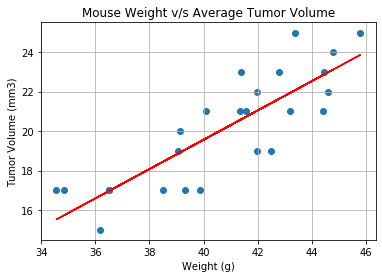

In [26]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
tumor=mergeddf.iloc[:,1]
weight=mergeddf.iloc[:,0]
correlation=st.pearsonr(weight, tumor)
print(f"The correlation between Weight and Tumor Volume is {round(correlation[0], 2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight,tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, tumor)
plt.plot(weight,regress_values, "r-" )
plt.grid()
plt.title("Mouse Weight v/s Average Tumor Volume")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {round(rvalue**2,2)}")
print(line_eq)
plt.show()